In [2]:
#!pip install --upgrade numpy scipy scikit-learn
#!pip install mplcursors
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplcursors
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('ecdc_cases.csv')
#df= df.iloc[::-1] #Cambio el orden de las filas para tener orden creciente de fecha
# Ordenar el DataFrame según la columna 'date_rep'
#df['date_rep'] = pd.to_datetime(df['date_rep'])
df= df.sort_values(by='date_rep')
df['cases_accumulated'] = df['cases'].cumsum()
df['deaths_accumulated'] = df['cases'].cumsum()
df.dtypes

date_rep                      object
day                            int64
month                          int64
year                           int64
cases                        float64
deaths                         int64
countries_and_territories     object
geo_id                        object
country_territory_code        object
pop_data_2018                float64
continent_exp                 object
load_date                     object
iso_country                   object
daterep                       object
cases_accumulated            float64
deaths_accumulated           float64
dtype: object

La columna 'cases_accumulated' no contiene valores NaN.


(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 [Text(-50.0, 0, '2020-10-25'),
  Text(0.0, 0, '2019-12-31'),
  Text(50.0, 0, '2020-02-19'),
  Text(100.0, 0, '2020-04-09'),
  Text(150.0, 0, '2020-05-29'),
  Text(200.0, 0, '2020-07-18'),
  Text(250.0, 0, '2020-09-06'),
  Text(300.0, 0, '2020-10-26'),
  Text(350.0, 0, ''),
  Text(400.0, 0, '')])

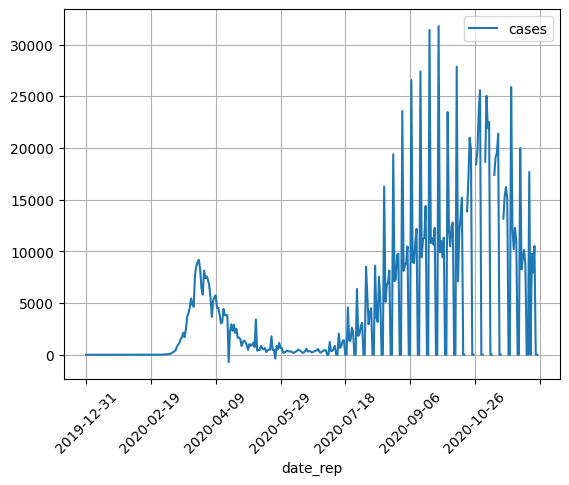

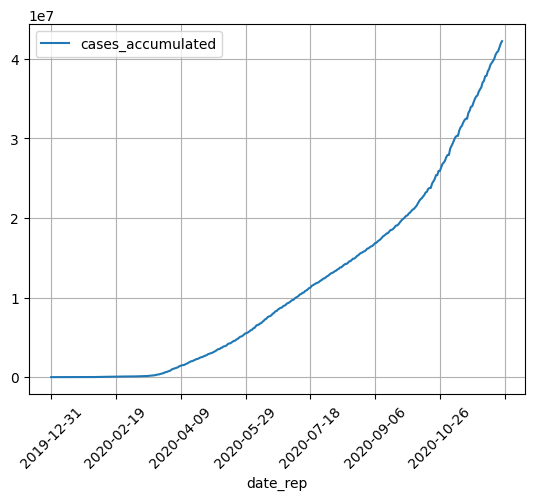

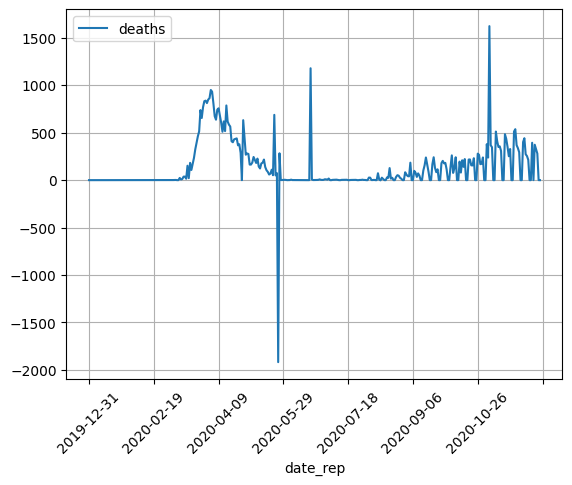

In [3]:
df.groupby('countries_and_territories').first().filter(['cases', 'deaths','date_rep'])
#df.groupby('countries_and_territories').first().filter(['continent_exp','cases', 'deaths','date_rep'])
#df.groupby('continent_exp').agg({'countries_and_territories': 'count','cases': 'count','deaths': 'count'})

df.loc[: , ['countries_and_territories', 'cases', 'deaths']].groupby(['countries_and_territories'])
#df.loc[: , ['countries_and_territories', 'cases', 'deaths']].groupby(['countries_and_territories'
#         ]).max().sort_values(by='date_rep',ascending=True).reset_index()[:15].style.background_gradient(cmap='rainbow')


df=df[df['countries_and_territories']=='Spain']

df.plot(kind='line',x='date_rep',y="cases",grid=True)
plt.xticks(rotation=45) 

#Elimina NaN en casos acumulados
df['cases_accumulated'] = df['cases_accumulated'].fillna(method='ffill', inplace=False)
contiene_nan = df['cases_accumulated'].isnull().any()

if contiene_nan:
    print("La columna 'cases_accumulated' contiene valores NaN.")
else:
    print("La columna 'cases_accumulated' no contiene valores NaN.")
    
df.plot(kind='line',x='date_rep',y="cases_accumulated",grid=True)
plt.xticks(rotation=45) 

df.plot(kind='line',x='date_rep',y="deaths",grid=True)
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para una mejor visualización

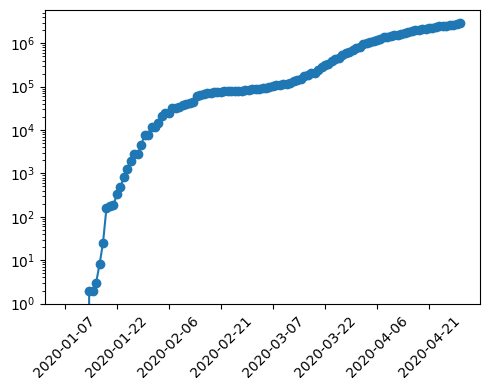

In [4]:
#PRIMERA OLA
fecha_inicio = '2020-01-07'
fecha_fin = '2020-04-31'
filtro_fechas = (df['date_rep'] >= fecha_inicio) & (df['date_rep'] <= fecha_fin)
fechas_rango = df.loc[filtro_fechas, 'date_rep']
cases_acumulado_rango_fechas = df.loc[filtro_fechas, 'cases_accumulated']
valor_inicio = cases_acumulado_rango_fechas[df['date_rep'] == fecha_inicio].iloc[0]
cases_acumulado_rango_fechas_resta = cases_acumulado_rango_fechas - valor_inicio

plt.figure(figsize=(5,4))
plt.plot(fechas_rango, cases_acumulado_rango_fechas_resta, marker='o');

fechas_ticks = fechas_rango.iloc[::15] 
plt.xticks(fechas_ticks, rotation=45)


plt.yscale('log') #Configurar la escala logaritmica en el eje y
mplcursors.cursor(hover=True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [5]:
len(fechas_rango)

115

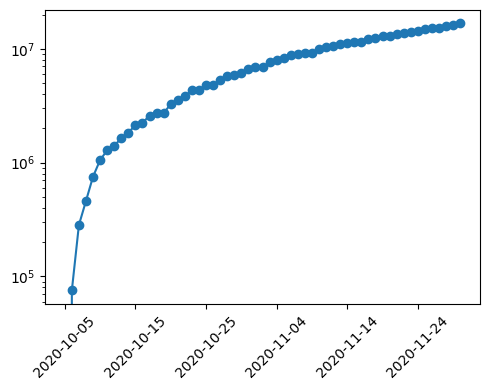

In [6]:
#SEGUNDA OLA
fecha_inicio = '2020-10-05'
fecha_fin = '2020-11-30'
filtro_fechas = (df['date_rep'] >= fecha_inicio) & (df['date_rep'] <= fecha_fin)
fechas_rango = df.loc[filtro_fechas, 'date_rep']
cases_acumulado_rango_fechas = df.loc[filtro_fechas, 'cases_accumulated']
valor_inicio = cases_acumulado_rango_fechas[df['date_rep'] == fecha_inicio].iloc[0]
cases_acumulado_rango_fechas_resta = cases_acumulado_rango_fechas - valor_inicio

plt.figure(figsize=(5,4))
plt.plot(fechas_rango, cases_acumulado_rango_fechas_resta, marker='o');

fechas_ticks = fechas_rango.iloc[::10] 
plt.xticks(fechas_ticks, rotation=45)

plt.yscale('log') #Configurar la escala logaritmica en el eje y
mplcursors.cursor(hover=True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()
filtro_fechas = (df['date_rep'] >= fecha_inicio) & (df['date_rep'] <= fecha_fin)
fechas_rango = df.loc[filtro_fechas, 'date_rep']

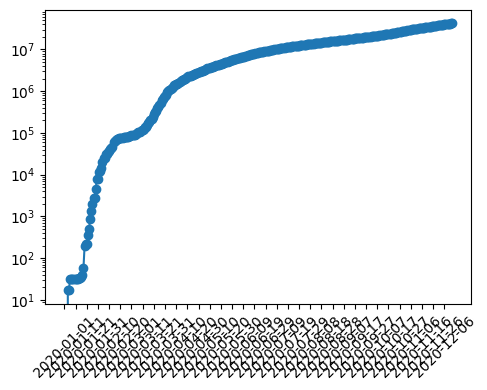

In [7]:
#AÑO COMPLETO
fecha_inicio = '2020-01-01'
fecha_fin = '2020-12-31'
filtro_fechas = (df['date_rep'] >= fecha_inicio) & (df['date_rep'] <= fecha_fin)
fechas_rango = df.loc[filtro_fechas, 'date_rep']
cases_acumulado_rango_fechas = df.loc[filtro_fechas, 'cases_accumulated']
valor_inicio = cases_acumulado_rango_fechas[df['date_rep'] == fecha_inicio].iloc[0]
cases_acumulado_rango_fechas_resta = cases_acumulado_rango_fechas - valor_inicio

plt.figure(figsize=(5,4))
plt.plot(fechas_rango, cases_acumulado_rango_fechas_resta, marker='o');

fechas_ticks = fechas_rango.iloc[::10] 
plt.xticks(fechas_ticks, rotation=45)

plt.yscale('log') #Configurar la escala logaritmica en el eje y
mplcursors.cursor(hover=True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()
filtro_fechas = (df['date_rep'] >= fecha_inicio) & (df['date_rep'] <= fecha_fin)
fechas_rango = df.loc[filtro_fechas, 'date_rep']

In [9]:
ds = pd.DataFrame({
    'fechas_rango': fechas_rango,
    'cases_acumulado_rango_fechas_resta': cases_acumulado_rango_fechas_resta
})
#ds['fechas_rango'] = pd.to_datetime(ds['fechas_rango'])
#ds['fechas_rango'] = ds['fechas_rango'].astype('int64') // 10**9  # Convertir fechas a segundos desde el epoch


In [110]:
#!pip uninstall scikit-learn
#!pip install -U scikit-learn
#import sklearn
#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LogisticRegression

In [111]:
#Dividir los datos en características (X) y etiquetas (y)
#X = ds[['fechas_rango']]  # Características
#y = ds['cases_acumulado_rango_fechas_resta']  # Etiquetas
# Dividir los datos en conjuntos de entrenamiento y prueba
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [112]:
#model = LogisticRegression()
#model.fit(X_train, y_train)

In [118]:
import statsmodels

In [119]:
#!pip install statsmodels
import statsmodels

In [162]:
import statsmodels.api as sm
# Convertir las fechas a formato datetime si es necesario
ds['fechas_rango'] = pd.to_datetime(ds['fechas_rango'])

# Preparar los datos
x = ds['fechas_rango'].values.astype(np.int64)  # Solo una columna de características
y = ds['cases_acumulado_rango_fechas_resta'].values  # Convertir y a un array NumPy


# Tomar el logaritmo natural de x
x_log = np.log(x)

# Agregar una constante para el término independiente
x_log_const = sm.add_constant(x_log)

# Crear el modelo de regresión logarítmica
modelo = sm.OLS(y, x_log_const)

# Ajustar el modelo a los datos
resultado = modelo.fit()


# Imprimir los resultados de la regresión
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 1.021e+04
Date:                Mon, 15 Apr 2024   Prob (F-statistic):           3.77e-64
Time:                        16:19:24   Log-Likelihood:                -811.24
No. Observations:                  57   AIC:                             1626.
Df Residuals:                      55   BIC:                             1631.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.366e+11   2.34e+09   -101.050      0.0

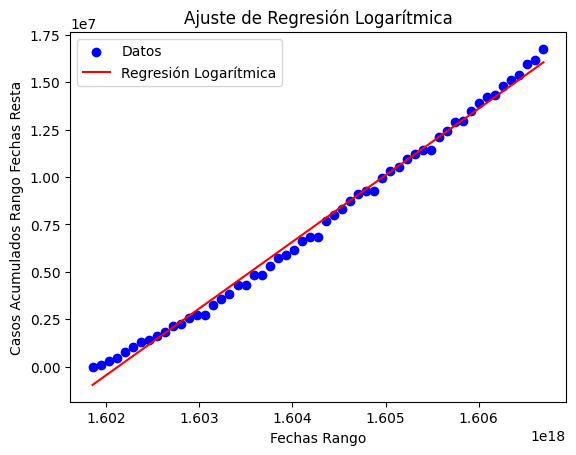

In [218]:
plt.scatter(x, y, color='blue', label='Datos')
plt.plot(x, resultado.predict(x_log_const), color='red', label='Regresión Logarítmica')
plt.xlabel('Fechas Rango')
plt.ylabel('Casos Acumulados Rango Fechas Resta')
plt.title('Ajuste de Regresión Logarítmica')
plt.legend()
plt.show()

In [164]:
from sklearn.metrics import r2_score, mean_squared_error

In [213]:
# Calcular las predicciones del modelo
y_pred = resultado.predict(x_log_const)

# Calcular R cuadrado
r2 = r2_score(y, y_pred)
# Tomar el logaritmo natural de y e y_pred
y_log = np.log(y[4:])
y_pred_log=np.log(y_pred[4:])
mse = mean_squared_error(y_log,y_pred_log)
print("R cuadrado:", r2)
print("Error cuadrático medio:", mse)

R cuadrado: 0.9946429204637334
Error cuadrático medio: 0.037900262393107044


In [214]:
residuos = resultado.resid

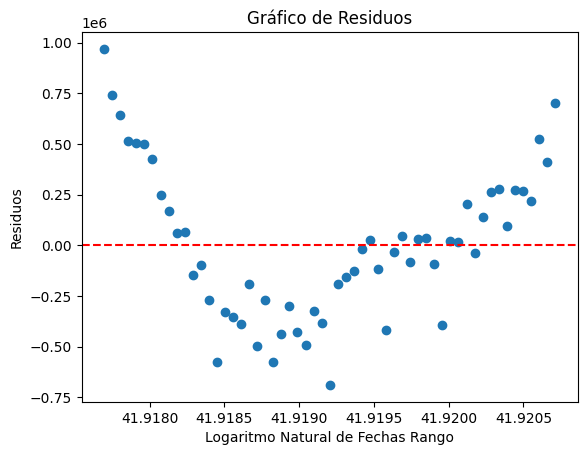

In [216]:
# Graficar los residuos
plt.scatter(x_log, residuos)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Logaritmo Natural de Fechas Rango')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos')
plt.show()

# Curva en forma de U: Si los residuos forman una curva en forma de U alrededor de la línea roja horizontal, podría indicar una falta de ajuste en el modelo. Esto sugiere que el modelo no está capturando adecuadamente la relación entre las variables o que la relación no es lineal, lo que podría requerir una transformación adicional de las variables o un modelo más complejo.

# Si la dispersión de los residuos cambia a medida que aumenta el valor de la variable independiente, esto se conoce como heterocedasticidad. Podría ser problemático si los residuos muestran una variación creciente o decreciente en su dispersión a lo largo de la variable independiente, lo que podría indicar que la varianza de los errores no es constante.

# La línea horizontal roja representa cero residuos, lo que sugiere que los residuos están centrados alrededor de cero. Sin embargo, para una evaluación completa de la independencia de los residuos, hay que aseegurarse de que no haya patrones sistemáticos en su distribución.

# Si hay algunos residuos que se alejan significativamente de la línea roja horizontal, podrían ser puntos atípicos o valores extremos que están influyendo en el modelo. Sería útil investigar estos puntos y determinar si tienen una explicación válida o si deben ser tratados de manera diferente en el análisis.

In [10]:
ds['fechas_rango'] = pd.to_datetime(ds['fechas_rango'])

# Preparar los datos
x = ds['fechas_rango'].values.astype(np.int64)  # Solo una columna de características
y = ds['cases_acumulado_rango_fechas_resta'].values  # Convertir y a un array NumPy

In [12]:
y

array([0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 2.000000e+00,
       2.000000e+00, 3.000000e+00, 8.000000e+00, 2.500000e+01,
       1.610000e+02, 1.810000e+02, 1.830000e+02, 3.340000e+02,
       4.760000e+02, 8.340000e+02, 1.292000e+03, 1.964000e+03,
       2.762000e+03, 2.765000e+03, 4.538000e+03, 7.754000e+03,
       7.770000e+03, 1.188100e+04, 1.188800e+04, 1.449900e+04,
       2.055600e+04, 2.445200e+04, 2.446700e+04, 3.142400e+04,
       3.143800e+04, 3.488800e+04, 3.749800e+04, 4.049100e+04,
       4.305200e+04, 4.512200e+04, 6.027600e+04, 6.448900e+04,
       6.704800e+04, 7.127600e+04, 7.317100e+04, 7.513600e+04,
       7.513600e+04, 7.575500e+04, 7.752700e+04, 7.847300e+04,
       7.899800e+04, 8.005000e+04, 8.091600e+04, 8.095800e+04,
       8.332600e+04, 8.341000e+04, 8.690100e+04, 8.787000e+04,
       9.025400e+04, 9.111300e+04, 9.336000e+04, 9.779700e+04,
       1.027840e+05, 1.067820e+05, 1.072230e+05, 1.1573